**Identificação**: BRENO ALAN ALVES MARQUES (2462286)

# [Domótica] Classificar as tarefas mais rotineiras de uma habitação
## Pré-processamento


## Iniciando a sessão no Spark

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()

### Iniciando DataSet 

* Carregando o DataSet

In [11]:
# import pandas as pd
#data_set_2021_8 = pd.read_csv('https://github.com/brolam/sbdia-projeto-I/raw/main/data/OHA-2021-8.csv')

data_set_2021_8 = spark.read \
.option("header","true") \
.option("inferSchema","true") \
.csv('../data/OHA-2021-8.csv')

* Exibir atributos do DataSet

In [12]:
data_set_2021_8.show(2)

+---+----+-----------+---------+----------+--------+---------+---------+------+----------+
|Day|Hour|PeriodOfDay|DayOfWeek|  UnixTime|Duration|   Watts1|   Watts2|Watts3|WattsTotal|
+---+----+-----------+---------+----------+--------+---------+---------+------+----------+
|  1|   0|  LateNight|   Sunday|1627786806|      14|163.01604|272.74854|     0|  435.7646|
|  1|   0|  LateNight|   Sunday|1627786820|      14|155.36642|273.27606|     0| 428.64252|
+---+----+-----------+---------+----------+--------+---------+---------+------+----------+
only showing top 2 rows



### Codificação de rótulo - as colunas PeriodOfDay e DayOfWeek passarão pelo processo de Codificação de rótulo

* Criar LabelEncoder para os atributos PeriodOfDay e DayOfWeek

In [13]:
from pyspark.ml.feature import StringIndexer

encoder_period_of_day = StringIndexer(inputCol="PeriodOfDay", outputCol="PeriodOfDayCode", stringOrderType="frequencyDesc")
encoder_day_of_week = StringIndexer(inputCol="DayOfWeek", outputCol="DayOfWeekCode", stringOrderType="frequencyDesc")

encoder_period_of_day_model = encoder_period_of_day.fit(data_set_2021_8)
encoder_day_of_week_model = encoder_day_of_week.fit(data_set_2021_8)

data_set_2021_8 = encoder_period_of_day_model.transform(data_set_2021_8)
data_set_2021_8 = encoder_day_of_week_model.transform(data_set_2021_8)

data_set_2021_8.show(2)



+---+----+-----------+---------+----------+--------+---------+---------+------+----------+---------------+-------------+
|Day|Hour|PeriodOfDay|DayOfWeek|  UnixTime|Duration|   Watts1|   Watts2|Watts3|WattsTotal|PeriodOfDayCode|DayOfWeekCode|
+---+----+-----------+---------+----------+--------+---------+---------+------+----------+---------------+-------------+
|  1|   0|  LateNight|   Sunday|1627786806|      14|163.01604|272.74854|     0|  435.7646|            0.0|          2.0|
|  1|   0|  LateNight|   Sunday|1627786820|      14|155.36642|273.27606|     0| 428.64252|            0.0|          2.0|
+---+----+-----------+---------+----------+--------+---------+---------+------+----------+---------------+-------------+
only showing top 2 rows



* Salvar LabelEncoder

In [9]:



#for idx, x in enumerate(encoder_period_of_day_model.labels): 
#    print(idx, x)

dataframe_encoder_period_of_day = spark.createDataFrame(data=enumerate(encoder_period_of_day_model.labels), schema = ["index","label"]) # encoder_period_of_day_model.labels
dataframe_encoder_period_of_day.printSchema()
dataframe_encoder_period_of_day.show(truncate=False)
dataframe_encoder_period_of_day.write.csv("../models/dataframe_encoder_period_of_day.csv")



root
 |-- index: long (nullable = true)
 |-- label: string (nullable = true)

+-----+------------+
|index|label       |
+-----+------------+
|0    |LateNight   |
|1    |EarlyMorning|
|2    |Morning     |
|3    |Noon        |
|4    |Eve         |
|5    |Night       |
+-----+------------+



Py4JJavaError: An error occurred while calling o252.csv.
: ExitCodeException exitCode=1: chmod: changing permissions of '/home/jovyan/work/sbdia-projeto-I/models/dataframe_encoder_period_of_day.csv': Operation not permitted

	at org.apache.hadoop.util.Shell.runCommand(Shell.java:1007)
	at org.apache.hadoop.util.Shell.run(Shell.java:900)
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:1212)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:1306)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:1288)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:856)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:387)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:360)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:847)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


* Carregar LabelEncoder

In [6]:
from pickle import load

encoder_period_of_day = load(open('../models/encoder_period_of_day.pkl', 'rb'))
#encoder_day_of_week = load(open('../models/encoder_day_of_week.pkl', 'rb'))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


* Adicionar Codigos para as colunas PeriodOfDay e DayOfWeek

In [204]:
data_set_2021_8["PeriodOfDayCode"] = encoder_period_of_day.transform(data_set_2021_8.PeriodOfDay)
data_set_2021_8["DayOfWeekCode"] = encoder_day_of_week.transform(data_set_2021_8.DayOfWeek)

* Exibir DataSet com a adição das colunas de código para PeridOfDay e DayOfWeek

In [205]:
data_set_2021_8.head()

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode
0,1,0,LateNight,Sunday,1627786806,14,163.01604,272.74854,0,435.76460,2,3
1,1,0,LateNight,Sunday,1627786820,14,155.36642,273.27606,0,428.64252,2,3
2,1,0,LateNight,Sunday,1627786834,14,155.10265,274.59497,0,429.69766,2,3
3,1,0,LateNight,Sunday,1627786848,14,156.15776,283.82730,0,439.98505,2,3
4,1,0,LateNight,Sunday,1627786862,14,157.74045,268.52805,0,426.26850,2,3


* Normatizar os atibutos previsores

In [206]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler_data_set = StandardScaler()
scaler_data_set.fit(data_set_2021_8.loc[:,['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal']])
dump(scaler_data_set, open('scaler_data_set.pkl', 'wb'))

* Aplicar o algoritimo KMeans para encontrar cinco padrões de consumo de energia 

In [207]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=100000)
X = scaler_data_set.transform(data_set_2021_8.loc[:,['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal']])
kmeans.fit(X)

KMeans(max_iter=100000, n_clusters=3)

* Salvar treinamento do KMeans

In [208]:
dump(kmeans, open('kmeans.pkl', 'wb'))

* Criar um código para cada classe de consumo encontrado pelo KMens

In [209]:
data_set_2021_8['EnergyUseClassCode'] = kmeans.predict(X)

* Exibir gráfico de Total de Watts Vs Períodos do dia Classifica por Consumo de Energia

No handles with labels found to put in legend.


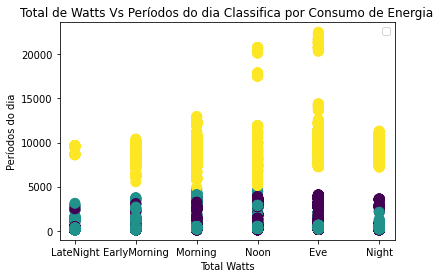

In [210]:
import matplotlib.pyplot as plt

plt.scatter(data_set_2021_8.PeriodOfDay, data_set_2021_8.WattsTotal, s = 100, c = kmeans.labels_)
plt.title('Total de Watts Vs Períodos do dia Classifica por Consumo de Energia')
plt.xlabel('Total Watts')
plt.ylabel('Períodos do dia')
plt.legend()

plt.show()

* Exibir exemplos de consumo de Energiar Classe Código Zero - Consumo Baixo

In [211]:
data_set_2021_8[data_set_2021_8.EnergyUseClassCode == 0]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyUseClassCode
0,1,0,LateNight,Sunday,1627786806,14,163.016040,272.74854,0,435.76460,2,3,0
1,1,0,LateNight,Sunday,1627786820,14,155.366420,273.27606,0,428.64252,2,3,0
2,1,0,LateNight,Sunday,1627786834,14,155.102650,274.59497,0,429.69766,2,3,0
3,1,0,LateNight,Sunday,1627786848,14,156.157760,283.82730,0,439.98505,2,3,0
4,1,0,LateNight,Sunday,1627786862,14,157.740450,268.52805,0,426.26850,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152496,30,23,Night,Monday,1630378733,14,54.866238,227.90593,0,282.77216,4,1,0
152497,30,23,Night,Monday,1630378747,14,58.295383,225.79570,0,284.09106,4,1,0
152498,30,23,Night,Monday,1630378761,14,54.602460,222.63031,0,277.23276,4,1,0
152499,30,23,Night,Monday,1630378775,14,57.240260,221.31143,0,278.55170,4,1,0


* Exibir exemplos de consumo de Energiar Classe Código Um - Consumo Médio

In [213]:
data_set_2021_8[data_set_2021_8.EnergyUseClassCode == 1]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyUseClassCode
12343,3,0,LateNight,Tuesday,1627959609,14,70.429260,117.118324,0,187.54759,2,5,1
12344,3,0,LateNight,Tuesday,1627959623,14,71.484380,117.909650,0,189.39404,2,5,1
12345,3,0,LateNight,Tuesday,1627959637,14,67.791460,115.535645,0,183.32710,2,5,1
12346,3,0,LateNight,Tuesday,1627959651,14,66.472560,114.216736,0,180.68930,2,5,1
12347,3,0,LateNight,Tuesday,1627959665,14,69.110360,115.535645,0,184.64600,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158457,31,23,Night,Tuesday,1630464207,15,82.299355,138.484500,0,220.78386,4,5,1
158458,31,23,Night,Tuesday,1630464221,14,83.354485,142.704970,0,226.05945,4,5,1
158459,31,23,Night,Tuesday,1630464235,14,82.299355,141.913650,0,224.21300,4,5,1
158460,31,23,Night,Tuesday,1630464249,14,82.563140,142.441210,0,225.00436,4,5,1


* Exibir exemplos de consumo de Energiar Classe Código Dois - Consumo Alto

In [214]:
data_set_2021_8[data_set_2021_8.EnergyUseClassCode == 2]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyUseClassCode
3042,1,11,Morning,Sunday,1627829395,14,196.252320,10126.2510,0,10322.5030,3,3,2
3043,1,11,Morning,Sunday,1627829409,14,221.311430,10088.5290,0,10309.8420,3,3,2
3044,1,11,Morning,Sunday,1627829423,14,213.925570,10112.5340,0,10326.4590,3,3,2
3045,1,11,Morning,Sunday,1627829437,14,205.484620,10194.8330,0,10400.3180,3,3,2
3046,1,11,Morning,Sunday,1627829451,14,190.449160,10115.6990,0,10306.1480,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158523,31,23,Night,Tuesday,1630465131,14,108.149796,8050.8290,0,8158.9790,4,5,2
158524,31,23,Night,Tuesday,1630465145,14,92.059220,8134.7120,0,8226.7705,4,5,2
158525,31,23,Night,Tuesday,1630465159,14,105.512000,8074.8335,0,8180.3450,4,5,2
158526,31,23,Night,Tuesday,1630465173,14,108.677360,8099.6290,0,8208.3060,4,5,2


* Adicionar coluna com rotulo das classes de consumo de eneriga.

In [215]:
Energy_use_class_code_low = 1
Energy_use_class_code_medium = 0
Energy_use_class_code_High = 2 

def get_energy_use_class_title(energy_use_class_code):
  if energy_use_class_code == Energy_use_class_code_low:
    return "Low"
  elif energy_use_class_code == Energy_use_class_code_medium:
    return "Medium"
  else:
    return "High"

data_set_2021_8['EnergyUseClass'] = data_set_2021_8['EnergyUseClassCode'].apply(get_energy_use_class_title)


* Adicionar aributos de hábitos de consumo conforme a classes de consumo de energia 

In [216]:
def get_energy_consumption_habit(class_and_total_watts):
  if (class_and_total_watts[0] == Energy_use_class_code_low) and (class_and_total_watts[1]  < 180):
    return 0
  elif (class_and_total_watts[1] > 5000):
    return 1
  elif ((class_and_total_watts[0] == Energy_use_class_code_medium)) and (class_and_total_watts[1] > 600):
    return 2
  elif ( (class_and_total_watts[0] != Energy_use_class_code_low) and (class_and_total_watts[1] < 3000)) :
    return 3
  else:
    return 999

def get_energy_consumption_habit_title(energy_consumption_habit_code):
  if (energy_consumption_habit_code == 0 ):
    return 'Out of home'
  elif (energy_consumption_habit_code == 1):
    return 'Someone is taking a shower'
  elif (energy_consumption_habit_code == 2):
    return 'Someone is washing clothes'
  elif (energy_consumption_habit_code == 3):
    return 'Someone is cooking'
  else:
    return 'Undefined'

data_set_2021_8['EnergyConsumptionHabitCode'] = data_set_2021_8[['EnergyUseClassCode', 'WattsTotal']].apply(get_energy_consumption_habit, axis=1)
data_set_2021_8['EnergyConsumptionHabit'] = data_set_2021_8['EnergyConsumptionHabitCode'].apply(get_energy_consumption_habit_title)

* Criar e Exibir resultado do Pré-processamento do Dataset para divisão de treinamento e treinamento

In [217]:
data_set_for_train_test =  data_set_2021_8[['PeriodOfDayCode', 'PeriodOfDay',  'DayOfWeekCode', 'DayOfWeek', 'EnergyUseClassCode', 'WattsTotal', 'EnergyConsumptionHabitCode', 'EnergyConsumptionHabit' ]]
data_set_for_train_test

,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode,EnergyConsumptionHabit
0,2,LateNight,3,Sunday,0,435.76460,3,Someone is cooking
1,2,LateNight,3,Sunday,0,428.64252,3,Someone is cooking
2,2,LateNight,3,Sunday,0,429.69766,3,Someone is cooking
3,2,LateNight,3,Sunday,0,439.98505,3,Someone is cooking
4,2,LateNight,3,Sunday,0,426.26850,3,Someone is cooking
...,...,...,...,...,...,...,...,...
158523,4,Night,5,Tuesday,2,8158.97900,1,Someone is taking a shower
158524,4,Night,5,Tuesday,2,8226.77050,1,Someone is taking a shower
158525,4,Night,5,Tuesday,2,8180.34500,1,Someone is taking a shower
158526,4,Night,5,Tuesday,2,8208.30600,1,Someone is taking a shower


* Criar Datasets de Treinamento e Testes dividindo a base em 80% para treinamento e 20% para testes por por Período de Dia, Dia da Semana e Hábito de Consumo:

In [218]:
from sklearn.model_selection import train_test_split

# Criar datasets vazios de treinamento e testes:
data_set_for_train = data_set_for_train_test.iloc[0:0]
data_set_for_test = data_set_for_train_test.iloc[0:0]

# Coletar e alimentar os datasets de treinamento e testes por Período de Dia, Dia da Semana e Hábito de Consumo 
for period_of_day in ['LateNight', 'EarlyMorning', 'Morning', 'Noon', 'Eve', 'Night' ]:
  for day_of_week in ['Sunday', 'Monday', 'Tuesday' 'Wednesday', 'Thursday', 'Friday', 'Saturday' ]:
    for energy_consumption_habit in ['Undefined', 'Out of home', 'Someone is taking a shower', 'Someone is washing clothes', 'Someone is cooking']:
      data_set_filtered = data_set_for_train_test.query(f"PeriodOfDay == '{period_of_day}' &  DayOfWeek == '{day_of_week}' & EnergyConsumptionHabit == '{energy_consumption_habit}'")
      if ( len(data_set_filtered) >= 10):
        train, test = train_test_split(data_set_filtered, train_size=0.8)
        data_set_for_train = data_set_for_train.append(train)
        data_set_for_test = data_set_for_test.append(test)
       

* Exibir quantidade de exemplos para o treinamento

In [219]:
data_set_for_train.groupby('EnergyConsumptionHabit').count()

,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode
EnergyConsumptionHabit,,,,,,,
Out of home,2577,2577,2577,2577,2577,2577,2577
Someone is cooking,61574,61574,61574,61574,61574,61574,61574
Someone is taking a shower,3647,3647,3647,3647,3647,3647,3647
Someone is washing clothes,4948,4948,4948,4948,4948,4948,4948
Undefined,11697,11697,11697,11697,11697,11697,11697


* Exibir quantidade de exemplos para os testes

In [220]:
data_set_for_test.groupby('EnergyConsumptionHabit').count()

,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode
EnergyConsumptionHabit,,,,,,,
Out of home,645,645,645,645,645,645,645
Someone is cooking,15409,15409,15409,15409,15409,15409,15409
Someone is taking a shower,923,923,923,923,923,923,923
Someone is washing clothes,1246,1246,1246,1246,1246,1246,1246
Undefined,2928,2928,2928,2928,2928,2928,2928


* Salvar Datasets de Treinamento e tests

In [221]:
data_set_for_train.to_csv('data_set_for_train.csv')
data_set_for_test.to_csv('data_set_for_test.csv')